In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import datasets
data= pd.read_csv(r"D:\Class\Data Science Project\Placements_Dataset.csv")

In [3]:
df= data.copy()

In [4]:
df.shape

(220000, 19)

In [5]:
df.columns

Index(['Name of Student', 'Roll No.', 'No. of DSA questions', 'CGPA',
       'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club', 'No. of backlogs',
       'Interview Room Temperature', 'Age of Candidate',
       'Branch of Engineering', 'Placement Package'],
      dtype='object')

In [6]:
df.head()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [7]:
df.isnull().sum()

Name of Student                    0
Roll No.                           0
No. of DSA questions               0
CGPA                               0
Knows ML                        4419
Knows DSA                          0
Knows Python                    4427
Knows JavaScript                4282
Knows HTML                      4329
Knows CSS                       4322
Knows Cricket                      0
Knows Dance                        0
Participated in College Fest       0
Was in Coding Club                 0
No. of backlogs                    0
Interview Room Temperature         0
Age of Candidate                   0
Branch of Engineering              0
Placement Package                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name of Student               220000 non-null  object 
 1   Roll No.                      220000 non-null  int64  
 2   No. of DSA questions          220000 non-null  int64  
 3   CGPA                          220000 non-null  float64
 4   Knows ML                      215581 non-null  object 
 5   Knows DSA                     220000 non-null  object 
 6   Knows Python                  215573 non-null  object 
 7   Knows JavaScript              215718 non-null  object 
 8   Knows HTML                    215671 non-null  object 
 9   Knows CSS                     215678 non-null  object 
 10  Knows Cricket                 220000 non-null  object 
 11  Knows Dance                   220000 non-null  object 
 12  Participated in College Fest  220000 non-nul

In [9]:
#Removing the unnecessary columns
df=df.drop(['Name of Student', 'Roll No.'],axis=1)
df.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [10]:
#Filling the null values of categorical columns with Mode values.
for i in ['Knows ML', 'Knows Python', 'Knows JavaScript','Knows HTML', 'Knows CSS']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

No. of DSA questions            0
CGPA                            0
Knows ML                        0
Knows DSA                       0
Knows Python                    0
Knows JavaScript                0
Knows HTML                      0
Knows CSS                       0
Knows Cricket                   0
Knows Dance                     0
Participated in College Fest    0
Was in Coding Club              0
No. of backlogs                 0
Interview Room Temperature      0
Age of Candidate                0
Branch of Engineering           0
Placement Package               0
dtype: int64

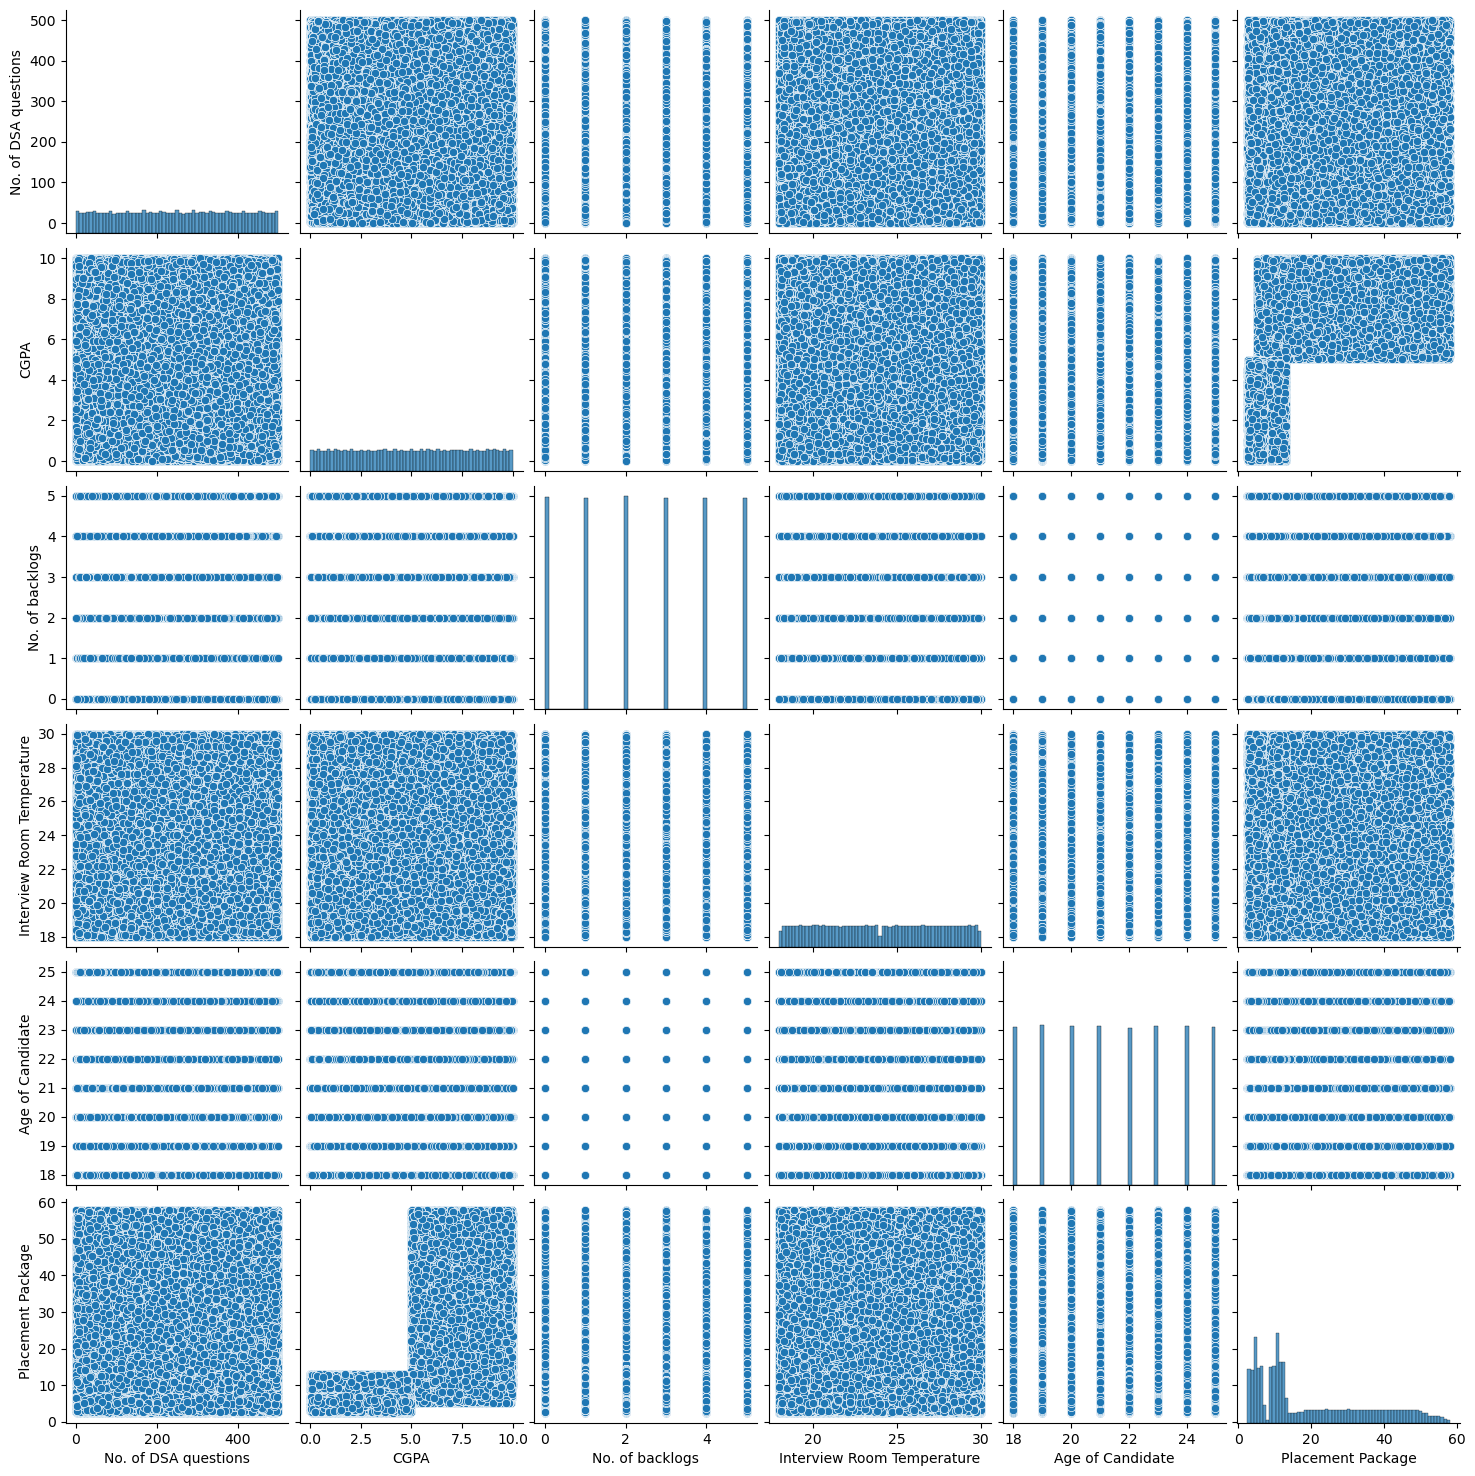

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
#Convert the categorical columns as numerical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col= ['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club', 'Branch of Engineering']

for i in col:
    df[i]= le.fit_transform(df[i])
df.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,1,1,1,1,0,1,0,0,1,1,2,24.2,24,1,20.01
1,24,1.23,1,0,0,1,0,0,1,0,0,1,1,20.5,18,1,10.97
2,333,9.85,0,1,1,0,1,0,0,0,0,0,1,21.6,25,3,7.51
3,132,1.96,0,0,1,0,1,0,0,0,1,0,4,21.2,20,1,4.96
4,198,9.73,1,1,1,1,1,1,1,1,0,0,1,20.7,21,2,46.30


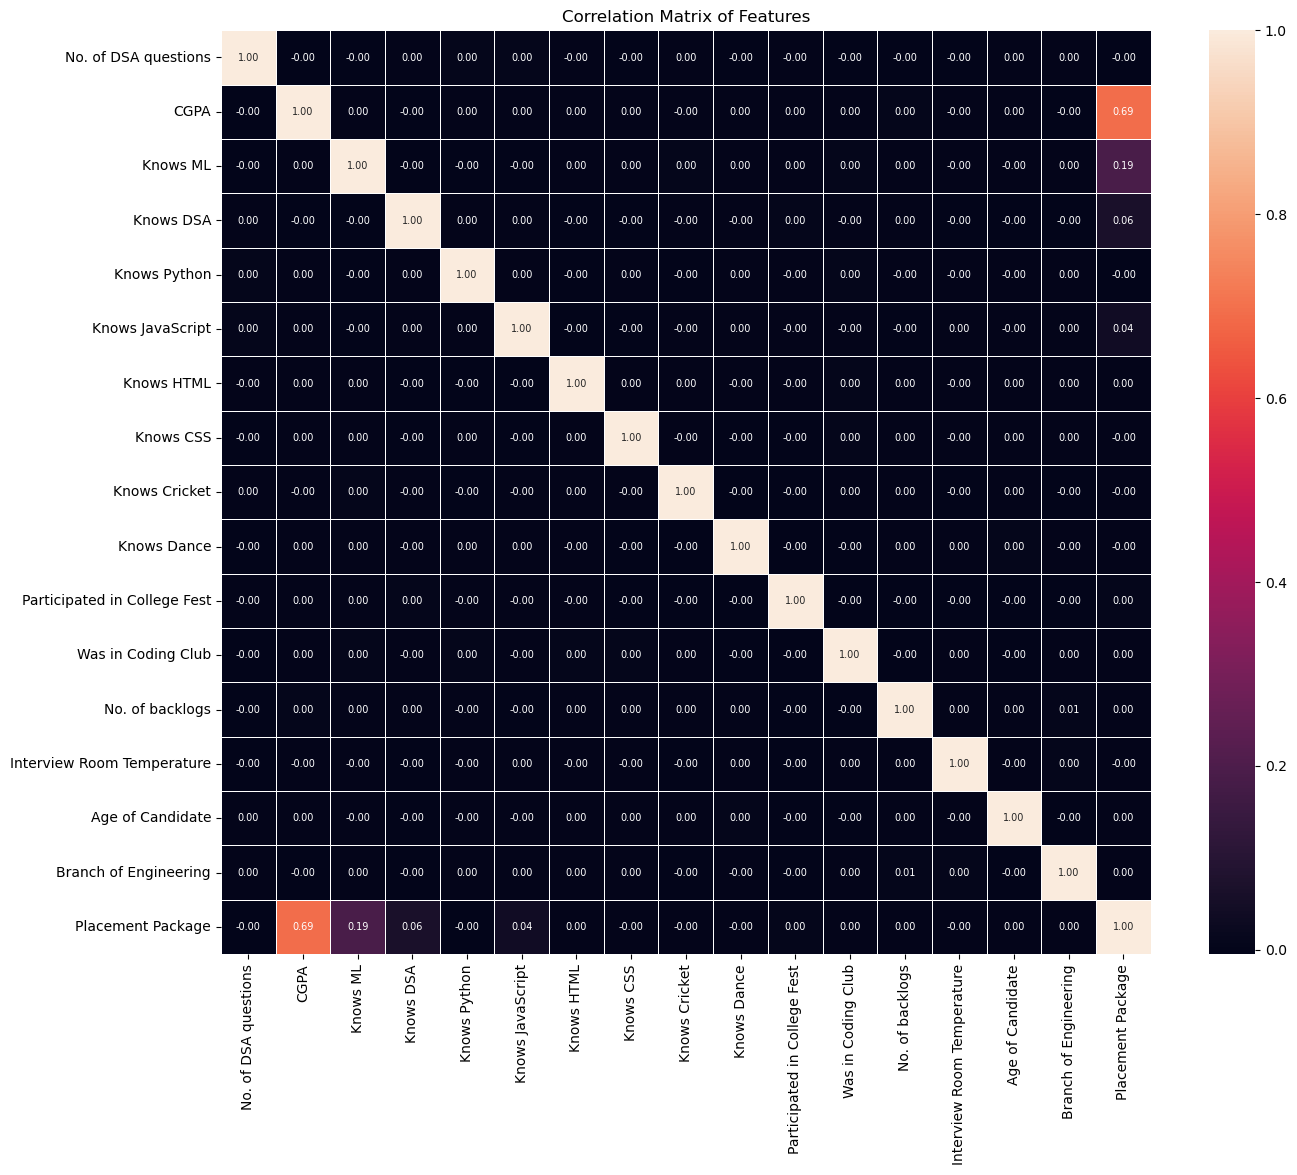

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
#Dividing the data into independent and dependent variable
y=df['Placement Package']
x=df.drop('Placement Package',axis=1)

In [16]:
x

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering
0,151,8.52,1,1,1,1,0,1,0,0,1,1,2,24.2,24,1
1,24,1.23,1,0,0,1,0,0,1,0,0,1,1,20.5,18,1
2,333,9.85,0,1,1,0,1,0,0,0,0,0,1,21.6,25,3
3,132,1.96,0,0,1,0,1,0,0,0,1,0,4,21.2,20,1
4,198,9.73,1,1,1,1,1,1,1,1,0,0,1,20.7,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,453,8.77,0,1,0,1,0,1,0,1,0,1,5,28.4,24,2
219996,375,6.15,0,0,1,1,0,0,0,1,0,0,3,27.6,18,2
219997,52,2.05,0,0,0,0,1,0,0,0,1,1,4,27.2,25,1
219998,404,5.63,0,0,1,1,0,1,0,0,0,1,0,25.0,21,3


In [17]:
y

0         20.01
1         10.97
2          7.51
3          4.96
4         46.30
          ...  
219995    24.81
219996    11.00
219997     3.82
219998    47.80
219999    23.08
Name: Placement Package, Length: 220000, dtype: float64

In [18]:
cols=[i for i in x.columns if x[i].nunique()>2]
cols

['No. of DSA questions',
 'CGPA',
 'No. of backlogs',
 'Interview Room Temperature',
 'Age of Candidate',
 'Branch of Engineering']

In [19]:
from sklearn.preprocessing import MinMaxScaler
mmax=MinMaxScaler()
x[cols]=mmax.fit_transform(x[cols])
x.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering
0,0.302,0.852,1,1,1,1,0,1,0,0,1,1,0.4,0.516667,0.857143,0.333333
1,0.048,0.123,1,0,0,1,0,0,1,0,0,1,0.2,0.208333,0.000000,0.333333
2,0.666,0.985,0,1,1,0,1,0,0,0,0,0,0.2,0.300000,1.000000,1.000000
3,0.264,0.196,0,0,1,0,1,0,0,0,1,0,0.8,0.266667,0.285714,0.333333
4,0.396,0.973,1,1,1,1,1,1,1,1,0,0,0.2,0.225000,0.428571,0.666667


In [20]:
#Train Test Spilt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 101)
x_train.shape, x_test.shape

((176000, 16), (44000, 16))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def train_model(x_train, x_test, y_train, y_test):
    regressor = {
        "Linear Regression": LinearRegression(),
        "Decision Tree Regressor": DecisionTreeRegressor(),
        "Bagging Regressor": BaggingRegressor(),
        "Random Forest Regressor": RandomForestRegressor(random_state=101)
    }

    for name, model in regressor.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        
        # Mean Squared Error (MSE)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f"MSE of Training Data: {mse_train}")
        print(f"MSE of Testing Data: {mse_test}")
        
        # R2 Score
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        print(f"R2 Score of Training Data: {r2_train}")
        print(f"R2 Score of Testing Data: {r2_test}")

In [23]:
# Call the train_model function
train_model(x_train, x_test, y_train, y_test)


================ Linear Regression ================

MSE of Training Data: 116.48384150235351
MSE of Testing Data: 116.54314939807529
R2 Score of Training Data: 0.5211946974394849
R2 Score of Testing Data: 0.5208425029538666

================ Decision Tree Regressor ================

MSE of Training Data: 3.014703663929844e-32
MSE of Testing Data: 136.68981044772727
R2 Score of Training Data: 1.0
R2 Score of Testing Data: 0.4380111762543025

================ Bagging Regressor ================

MSE of Training Data: 13.707350003630685
MSE of Testing Data: 77.02493766409091
R2 Score of Training Data: 0.9436561176113113
R2 Score of Testing Data: 0.6833183543444744

================ Random Forest Regressor ================

MSE of Training Data: 9.791960962254093
MSE of Testing Data: 70.52986737342978
R2 Score of Training Data: 0.9597502729071817
R2 Score of Testing Data: 0.7100222973877648


<h3> Regularization Techniques </h3>

In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def train_model_reg(x_train, x_test, y_train, y_test):
    reg = {
        "Ridge Regularization": Ridge(alpha= 0.1),
        "Lasso Regularization": Lasso(alpha= 0.1),
        "Elastic Net Regularization": ElasticNet(alpha= 0.1)
    }

    for name, model in reg.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        
        # Mean Squared Error (MSE)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f"MSE of Training Data: {mse_train}")
        print(f"MSE of Testing Data: {mse_test}")
        
        # R2 Score
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        print(f"R2 Score of Training Data: {r2_train}")
        print(f"R2 Score of Testing Data: {r2_test}")

In [26]:
# Call the train_model function
train_model_reg(x_train, x_test, y_train, y_test)


================ Ridge Regularization ================

MSE of Training Data: 116.4838415078269
MSE of Testing Data: 116.54314574326759
R2 Score of Training Data: 0.5211946974169867
R2 Score of Testing Data: 0.5208425179803053

================ Lasso Regularization ================

MSE of Training Data: 116.73346262541443
MSE of Testing Data: 116.7068133348791
R2 Score of Training Data: 0.5201686330874583
R2 Score of Testing Data: 0.5201696122458269

================ Elastic Net Regularization ================

MSE of Training Data: 134.2085434643309
MSE of Testing Data: 134.0994047543157
R2 Score of Training Data: 0.44833754252218194
R2 Score of Testing Data: 0.44866141451197594


<h3> Boosting Ensemble Techique </h3>

In [28]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

def train_model_boost(x_train, x_test, y_train, y_test):
    boost = {
        "AdaBoosting": AdaBoostRegressor(),
        "GradientBoosting": GradientBoostingRegressor(),
        "XGBoosting": XGBRegressor()
    }

    for name, model in boost.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        
        # Mean Squared Error (MSE)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f"MSE of Training Data: {mse_train}")
        print(f"MSE of Testing Data: {mse_test}")
        
        # R2 Score
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        print(f"R2 Score of Training Data: {r2_train}")
        print(f"R2 Score of Testing Data: {r2_test}")

In [29]:
# Call the train_model function
train_model_boost(x_train, x_test, y_train, y_test)


================ AdaBoosting ================

MSE of Training Data: 77.18669500864895
MSE of Testing Data: 77.25114698759099
R2 Score of Training Data: 0.6827251026356678
R2 Score of Testing Data: 0.6823883134641944

================ GradientBoosting ================

MSE of Training Data: 76.5336548173953
MSE of Testing Data: 77.02960434963477
R2 Score of Training Data: 0.685409415775796
R2 Score of Testing Data: 0.6832991676537401

================ XGBoosting ================

MSE of Training Data: 68.13978434836272
MSE of Testing Data: 78.26931652702798
R2 Score of Training Data: 0.7199123102351764
R2 Score of Testing Data: 0.6782021938114737


<h3> Conclusion </h3>
In this analysis, we performed a comprehensive exploration and modeling process for predicting CTC (Cost to Company) using various regression models. The steps included: <br>

1. Data Exploration and Preprocessing: We started by loading the dataset, handling potential issues such as missing values or outliers, and preparing the data for modeling.

2. Correlation Analysis: By examining correlations between features, we gained insights into feature importance and their relationship to the target variable. This guided the feature selection process for our models.

3. Model Training and Evaluation: We trained multiple regression models, including Linear Regression, Decision Tree Regressor, Bagging Regressor, and RandomForest Regressor. Each model was evaluated using Mean Squared Error (MSE) and R² score for both training and testing datasets.

4. Boosting Techniques: We also explored boosting methods such as AdaBoost, GradientBoosting, and XGBoost to improve the prediction accuracy and reduce error rates. These techniques were applied and similarly evaluated with MSE and R² metrics.

<h3> Key Findings </h3>

1. Model Performance: Among the regression models, RandomForest and GradientBoosting provided better accuracy in predicting CTC, with lower MSE and higher R² scores. These models showed greater potential for deployment in real-world prediction scenarios.

2. Impact of Ensemble Methods: The application of ensemble methods (Bagging, Boosting) helped improve the predictive power of individual models. The use of techniques like Random Forest and XGBoost demonstrated the importance of combining multiple trees to achieve better results.

3. Feature Importance: Through the models, certain features stood out as more important in predicting the target (CTC). These insights can be valuable for future feature engineering and refining the prediction model.